# MALLORN Astronomical Classification Challenge

## Overview
The **Many Artificial LSST Lightcurves based on Observations of Real Nuclear transients (MALLORN) Classifier Challenge** invites participants to develop machine learning algorithms to photometrically identify **Tidal Disruption Events (TDEs)**. 


## Objective
* **Goal**: Detect TDEs—stars being torn apart by supermassive black holes—within a simulated LSST dataset.
* **Significance**: TDEs are rare (~100 known) but valuable for studying black holes.
* **Data**: Simulated lightcurves based on real observations from the Zwicky Transient Facility (ZTF).

## Evaluation
* **Metric**: **F1 Score** (harmonic mean of precision and recall).
* **Reasoning**: The dataset is highly imbalanced as TDEs are significantly rarer than other transients.
* **Target**: Binary classification:
    * `1`: TDE
    * `0`: Not TDE

## Submission Format
The submission file must be a CSV containing two columns: `object_id` and `prediction`.

| object_id | prediction |
| :--- | :--- |
| Eluwaith_Mithrim_nothrim | 0 |
| Eru_heledir_archam | 0 |
| ... | ... |

# Data Description

## 📂 File Overview
The dataset is divided into training and testing sets, split across multiple folders for manageability.

| File / Directory | Description |
| :--- | :--- |
| **Split [01-20]** | Directories containing the respective splits of the data. Each split is roughly equal in size. |
| **`[train/test]_full_lightcurves.csv`** | Contains the full time-series observations (light curves) for objects. Multiple objects are stacked in one file and can be extracted using `object_id`. |
| **`[train/test]_log.csv`** | Metadata for objects, including redshift, extinction (`EBV`), `SpecType` (True Class), and `target` (Binary TDE label). Also contains the `split` column to locate the object's data file. |
| **`sample_submission.csv`** | A valid submission file example. |


## 📝 Log File Columns (Metadata)
These files (`train_log.csv` / `test_log.csv`) contain static information about each astronomical object.

| Column | Description |
| :--- | :--- |
| **`object_id`** | Unique identifier composed of 3 Sindarin (Elvish) words. |
| **`Z`** | **Redshift**. Spectroscopic (negligible error) for training data; Simulated photometric (with error) for test data. |
| **`Z_err`** | Error in the redshift. (Blank for training data). |
| **`EBV`** | **Extinction Coefficient** ($E(B-V)$). Measures light obscured by dust. Used to de-extinct flux measurements. |
| **`SpecType`** | **True Classification**. The spectroscopically defined type (e.g., SN Ia, TDE). *Blank for test data.* |
| **`English Translation`** | Translation of the `object_id`. (For fun; unimportant for classification). |
| **`split`** | The specific folder name containing the lightcurve file for this object. |
| **`target`** | **Target Variable** (Training only). Binary classification: **1** = TDE, **0** = Non-TDE. |


## 📈 Lightcurve Data Columns
These files (`*_full_lightcurves.csv`) contain the time-series photometric data.

| Column | Description |
| :--- | :--- |
| **`object_id`** | Unique identifier linking to the log file. |
| **`Time (MJD)`** | **Modified Julian Date**. Days since Nov 17, 1858. |
| **`Flux`** | Measured brightness in Microjanskys ($\mu$Jy). *Note: These are unextincted and need correction using `EBV`.* |
| **`Flux_err`** | Uncertainty/Error in the flux measurement. |
| **`Filter`** | The LSST passband filter used: **u, g, r, i, z, y**. Each filter captures a specific wavelength range. |


## ℹ️ Additional Context

* **Observation Gaps:** Due to LSST cadence, solar position, and simulated weather, there will be gaps between observations. Light curve quality varies.
* **Nuclear Transients:** All objects are simulated based on real ZTF observations of **nuclear transients** (events occurring near the center of galaxies). No galactic transients are included.
* **Negative Flux:** Flux is measured relative to a baseline. If the object is fainter than the baseline (or due to noise, particularly in AGN), flux values can be negative.
* **Object Types Included:**
    * **Supernovae:** SN Ia, SN Ia-91T-like, SN Ia-91bg-like, SN Ia02cx-like, SN Ia-pec, SN Ib, SN Ib/c, SN Ic, SN Ic-BL, SN II, SN IIb, SN IIn, SLSN-I, SLSN-II.
    * **Other:** **TDEs** (Target), AGN (Active Galactic Nuclei).

## 1. Setup

Load libraries

In [2]:
import sys
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# add src directory to path for module imports
sys.path.append(os.path.abspath('..'))

# professional plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Download datasets

In [3]:
COMPETITION_NAME = 'mallorn-astronomical-classification-challenge'

# Check if data exists, if not, download it
if not os.path.exists('../data/raw/train_log.csv'):
    print(f"Downloading {COMPETITION_NAME}...")
    !kaggle competitions download -c {COMPETITION_NAME} -p ../data/raw
    
    print("Unzipping data...")
    with zipfile.ZipFile(f"../data/raw/{COMPETITION_NAME}.zip", 'r') as zip_ref:
        zip_ref.extractall("../data/raw")
    print("Download and Extraction Complete!")
else:
    print("Data already exists. Skipping download.")

Data already exists. Skipping download.


Load Datasets

In [15]:
RAW_DATA_PATH = '../data/raw/'

log_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'train_log.csv'))
lightcurves_01_df = pd.read_csv(os.path.join(RAW_DATA_PATH, 'split_01/train_full_lightcurves.csv'))

# 2. Exploration

In [16]:
for i in range (1, 21):
    folder_name = f"split_{i:02d}" # Formats to 'split_01', 'split_02'
    file_path = Path(RAW_DATA_PATH) / folder_name / ("train_full_lightcurves.csv")
    
    lc_df = pd.read_csv(file_path)
    print(folder_name)
    print(lc_df.isna().sum())

split_01
object_id      0
Time (MJD)     0
Flux          11
Flux_err       0
Filter         0
dtype: int64
split_02
object_id     0
Time (MJD)    0
Flux          6
Flux_err      0
Filter        0
dtype: int64
split_03
object_id     0
Time (MJD)    0
Flux          5
Flux_err      0
Filter        0
dtype: int64
split_04
object_id      0
Time (MJD)     0
Flux          12
Flux_err       0
Filter         0
dtype: int64
split_05
object_id      0
Time (MJD)     0
Flux          15
Flux_err       0
Filter         0
dtype: int64
split_06
object_id      0
Time (MJD)     0
Flux          11
Flux_err       0
Filter         0
dtype: int64
split_07
object_id       0
Time (MJD)      0
Flux          306
Flux_err        0
Filter          0
dtype: int64
split_08
object_id     0
Time (MJD)    0
Flux          6
Flux_err      0
Filter        0
dtype: int64
split_09
object_id       0
Time (MJD)      0
Flux          315
Flux_err        0
Filter          0
dtype: int64
split_10
object_id     0
Time (MJD)    0
F

In [5]:
# quick look
print("Metadata Shape:", log_df.shape)
print("Lightcurves Shape:", lightcurves_01_df.shape)

Metadata Shape: (3043, 8)
Lightcurves Shape: (26324, 5)


In [6]:
# Check for Missing Values
print("\nMissing Values in Log:")
print(log_df.isnull().sum())


Missing Values in Log:
object_id                 0
Z                         0
Z_err                  3043
EBV                       0
SpecType                  0
English Translation       0
split                     0
target                    0
dtype: int64


We only have missing data in Z_err, which can safely be filled with 0.

In [7]:
# Class Balance
tde_count = log_df['target'].sum()
total_count = len(log_df)
print(f"\nTotal Objects: {total_count}")
print(f"Total TDEs (Target=1): {tde_count}")
print(f"TDE Percentage: {tde_count / total_count * 100:.2f}%")


Total Objects: 3043
Total TDEs (Target=1): 148
TDE Percentage: 4.86%


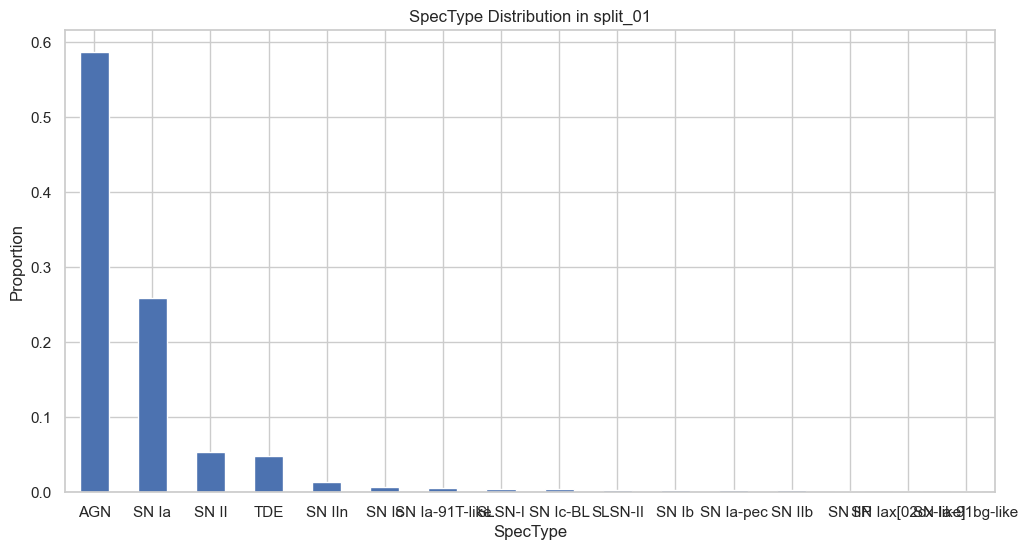

In [8]:
# SpecType distribution in split_01
log_df['SpecType'].value_counts(normalize=True).plot(kind='bar', title='SpecType Distribution in split_01')
plt.xlabel('SpecType')
plt.ylabel('Proportion')

# Horizontal bar plot for better readability
plt.xticks(rotation=0)
plt.show()

# 🔭 Spectral Types in Split 01

The following table details the object types found in the first data split.

| SpecType | Full Name | Target Class | Description |
| :--- | :--- | :--- | :--- |
| **TDE** | **Tidal Disruption Event** | **1 (Target)** | **The Main Goal.** A star ripped apart by a supermassive black hole. <br>• **Signal:** Hot (Blue/UV), long-lasting, smooth decay ($t^{-5/3}$ power law). <br>• **Location:** Always at the exact center of a galaxy. |
| **AGN** | Active Galactic Nucleus | 0 (Noise) | A supermassive black hole constantly feeding on gas (not a specific star). <br>• **Signal:** Random, stochastic flickering. Can look like "noise" or random walks. Often has negative flux (dips below baseline). <br>• **Challenge:** Can be confused with TDEs because they are also in the galaxy center and hot/blue. |
| **SN Ia** | Type Ia Supernova | 0 (Noise) | "Standard Candle" explosion. A white dwarf star explodes after stealing mass from a companion. <br>• **Signal:** Very consistent brightness and shape. No hydrogen lines. |
| **SN II** | Type II Supernova | 0 (Noise) | Core-collapse of a massive star. <br>• **Signal:** Often shows a long "plateau" (brightness stays flat for months) before dropping. Shows Hydrogen lines. |
| **SN Ia-pec** | Peculiar Type Ia Supernova | 0 (Noise) | A variation of the standard Type Ia (e.g., SN 1991T or 1991bg). <br>• **Signal:** Can be brighter (91T) or dimmer/redder (91bg) than normal SN Ia, making them harder to filter out. |
| **SN Ib** | Type Ib Supernova | 0 (Noise) | Core-collapse of a massive star that lost its outer Hydrogen layer. <br>• **Signal:** Similar to SN Ia but usually fainter and redder. No Hydrogen, but shows Helium lines. |

### 💡 Key Takeaway for Classification
* **TDE (Target):** Smooth, Blue, Long decay.
* **AGN (Main Impostor):** Jittery, Blue, Never truly "fades away" (just fluctuates).
* **Supernovae (Background):** Distinct rise-and-fall shapes, often redder (cooler) than TDEs.

<Axes: xlabel='Z', ylabel='Density'>

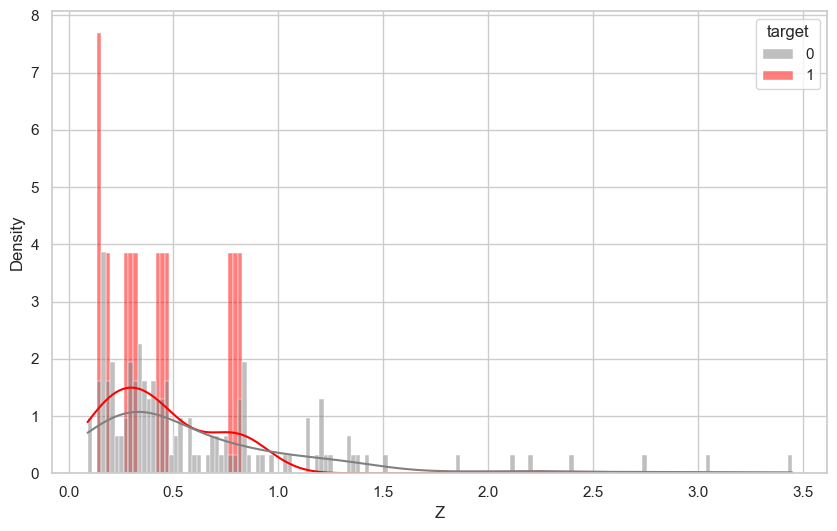

In [9]:
# Log entries for split_01
log_01_df = log_df[log_df['split'] == 'split_01']

# Compare Redshift distributions for TDE vs Non-TDE (Split 01)
plt.figure(figsize=(10, 6))

sns.histplot(
    data=log_01_df,
    x="Z",
    hue="target",
    kde=True,
    stat="density",
    common_norm=False,                  # Scale each group independently
    palette={0: "gray", 1: "red"},
    alpha=0.5,                          # Transparency for overlay
    bins=len(log_01_df)
)

<Axes: xlabel='Z', ylabel='Density'>

Error in callback <function _draw_all_if_interactive at 0x0000012B34FE7BA0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

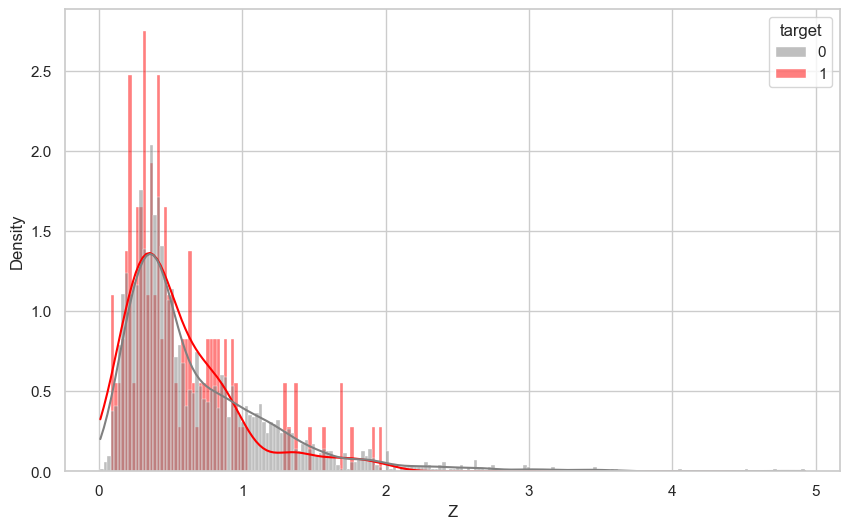

In [10]:
# Compare Redshift distributions for TDE vs Non-TDE (Full log)
plt.figure(figsize=(10, 6))

sns.histplot(
    data=log_df,
    x="Z",
    hue="target",
    kde=True,
    stat="density",
    common_norm=False,                  # Scale each group independently
    palette={0: "gray", 1: "red"},
    alpha=0.5,                          # Transparency for overlay
    bins=200
)

This shows that Redshift(Z) is actually a strong feature, as TDEs tend to happen at lower Z.

In [ ]:
from src import plotting

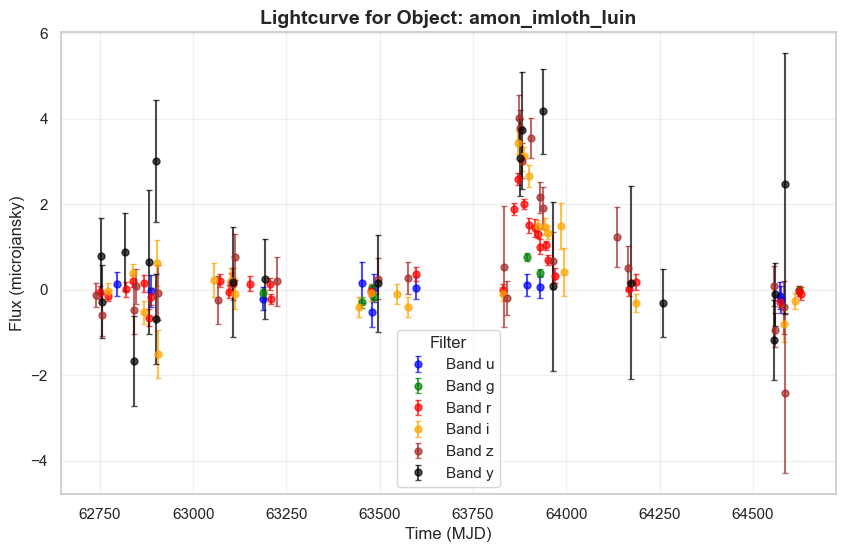

In [ ]:
# Plot random lightcurves from split_01 with TDEs
plotting.plot_random(log_01_df, lightcurves_01_df, True)

- As dust shines the brightest in band y, we can safely treat them as noise for now, for both TDE and non-TDE.
- Some flux varies a lot and can confuse the model about the true peak (where TDEs happen).
- Band i and r actually shines brighter than u at TDEs peak, because of dust, and they block blue more than red.
- There are many gaps, maybe due to some stars were in the way.
- As TDEs rises fast (we can see in the plots) and fades slowly (following $t^{-5/3}$ law), we need to somehow engineer this "Duration" feature, with the gaps being the main challange.

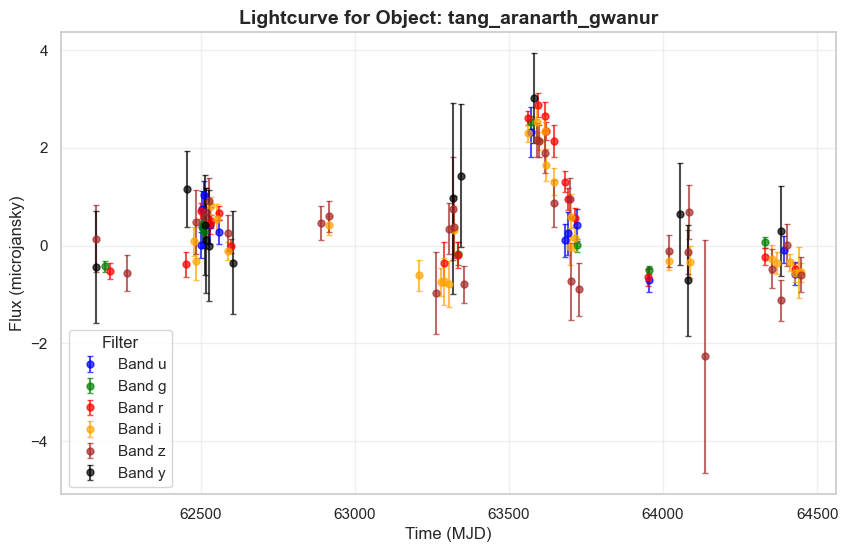

In [ ]:
# Plot random lightcurves from split_01 with non_TDEs
plotting.plot_random(log_01_df, lightcurves_01_df, False)

- First of all, the first plot looks more TDE-like than both of the TDE plots we see above.

In [ ]:
Non_TDE_suspect_id = "ruith_nur_aranarth"

# Show log entry for suspect object
log_01_df[log_01_df['object_id'] == Non_TDE_suspect_id]

,object_id,Z,Z_err,EBV,SpecType,English Translation,split,target
134,ruith_nur_aranarth,0.2025,NaN,0.015,SN II,"anger + race + kingdom, realm",split_01,0


- SpecType is SN II, "brightness stays flat for months", pefect with the description. With low Z and dust, we know that the colors here are true color. With that in mind, this plot looks less TDE than ever as it is not hot.

### As the data is quite messy and misleading, we have to clean it a bit before continuing.

In [ ]:
from src import preprocess

In [ ]:
# Getting true flux values factoring Z and EBV
clean_log, clean_lc = preprocess.clean_data(log_01_df, lightcurves_01_df)

In [ ]:
# Pinning down suspect id for further analysis
TDE_suspect_id = "elu_rusc_nath"

In [ ]:
log_01_df[log_01_df['object_id'] == TDE_suspect_id]

,object_id,Z,Z_err,EBV,SpecType,English Translation,split,target
37,elu_rusc_nath,0.826,NaN,0.042,TDE,pale blue + fox + web,split_01,1


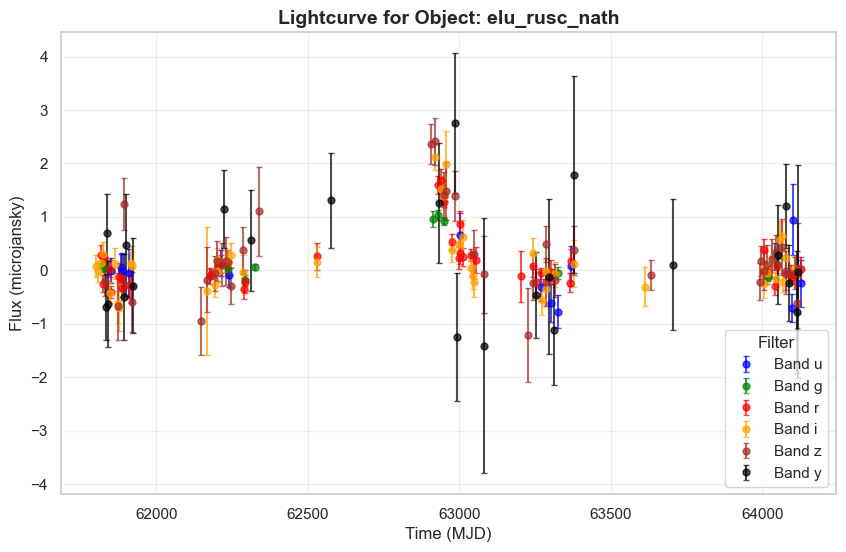

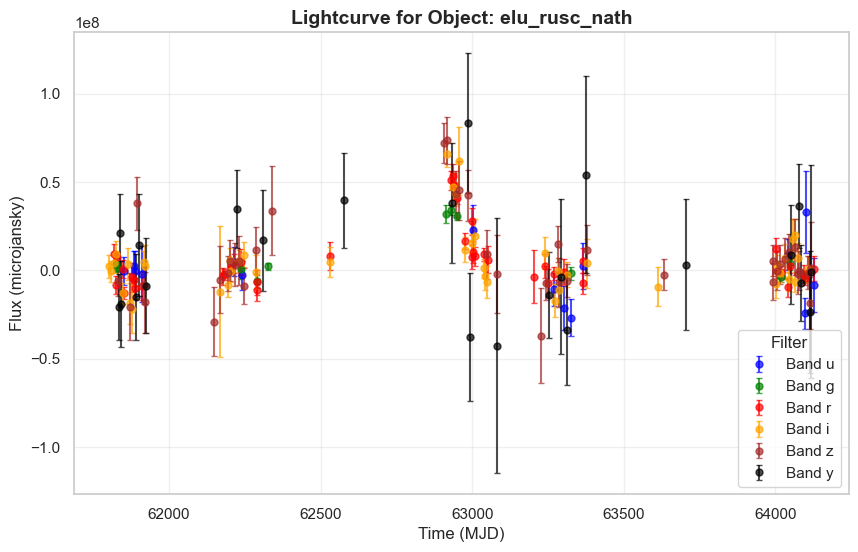

In [ ]:
# Verifying cleaned lightcurves
plotting.plot_lightcurve(TDE_suspect_id, lightcurves_01_df)
plotting.plot_lightcurve(TDE_suspect_id, clean_lc)

- It did scale Flux.
- The peak is still Red and Orange, but it is due to Redshift, and doing K-Correction is complex and expensive so we'll leave it to the model.

In [1]:
X_train = pd.read_parquet('..\\data\\processed\\train_features.parquet')

X_train.drop(columns=['target', 'object_id'], inplace=True)

NameError: name 'pd' is not defined

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr_matrix = X_train.corr().abs()

# Plot heatmap (Optional, for visual check)
# sns.heatmap(corr_matrix)

# Find pairs with correlation > 0.95
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Features to drop (High Correlation): {len(to_drop)}")
print(to_drop)

Features to drop (High Correlation): 18
['Flux_corrected_mean_z', 'Time_relative_max_r', 'Time_relative_max_y', 'Time_relative_max_z', 'Time_relative_count_r', 'Time_relative_count_u', 'SNR_obs_mean_i', 'SNR_obs_mean_r', 'SNR_obs_mean_y', 'SNR_obs_mean_z', 'amplitude_u', 'amplitude_g', 'amplitude_r', 'amplitude_i', 'amplitude_z', 'duration_global', 'color_change_u_g', 'decay_ratio_u']
